In [1]:
import pandas as pd

In [7]:
col_select={'age': 'age',
    'class of worker': 'class_of_worker',
    'industry code': 'industry_code',
    'occupation code': 'occupation_code',
    'education': 'education',
    'wage per hour': 'wage_per_hour',
    'enrolled in edu inst last wk': 'edu_inst',
    'marital status': 'marital',
    # 'major industry code': 'AMJIND',
    # 'major occupation code': 'AMJOCC',
    'mace': 'mace',
    'hispanic Origin': 'hispanic',
    'sex': 'sex',
    'member of a labor union': 'labor_union',
    'reason for unemployment': 'reason_unemployment',
    'full or part time employment stat': 'employment_type',
    'capital gains': 'gains',
    'capital losses': 'losses',
    'divdends from stocks': 'divdends',
 
    'federal income tax liability': 'liability',
 
    'region of previous residence': 'GRINREG',
    'state of previous residence': 'state_residence',
    
    'detailed household summary in household': 'household_summary',
    'instance weight': 'instance_weight',
 
    'migration code-change in msa': 'migration_msa',
    'migration code-change in reg': 'migration_reg',
 
    'migration code-move within reg': 'migration_within',
 
    'live in this house 1 year ago': 'live_one_year',
 
    'migration prev res in sunbelt': 'sunbelt',
    'num persons worked for employer': 'person_worked',
    'family members under 18': 'under18',
 
    'country of birth father': 'PEFNTVTY',
    'country of birth mother': 'PEMNTVTY',
    'country of birth self': 'PENATVTY',
 
    'citizenship': 'citizen',
 
    'total person income': 'person_income',
    'own business or self employed': 'own_bus',
    
    # 'fill inc questionnaire for veteran\'s admin': 'VETQVA',
    'weeks worked in year': 'week_workd',
    # 'veterans benefits': 'VETYN',
    'taxable income amount': 'income',
    }


In [9]:
# cens=pd.read_csv("process/census_income_learn.csv")

In [11]:
df_train=pd.read_csv("process/census_income_learn.csv")
# Manual Selection
df_train=df_train[col_select.keys()]
# rename
df_train.rename(columns=col_select,inplace=True)



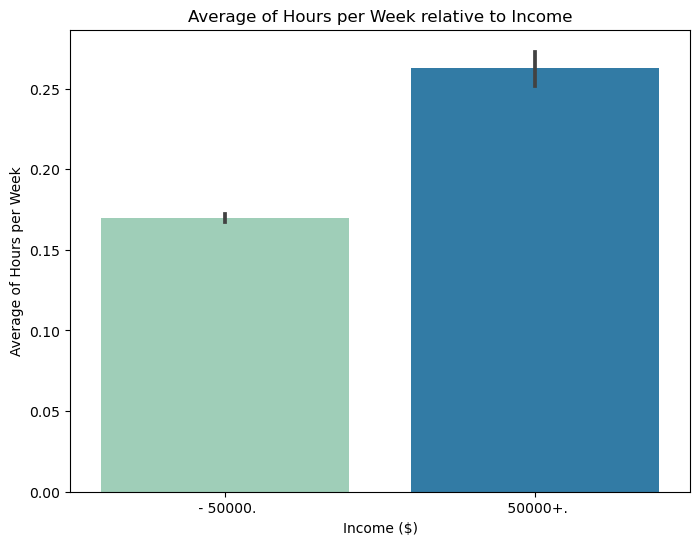

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=[8,6])
sb.barplot(data=df_train, x='income', y='person_income', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

/var/folders/n9/7_hgqwcd6jg5mvlq85vqtttw0000gn/T/ipykernel_3198/2035307408.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/var/folders/n9/7_hgqwcd6jg5mvlq85vqtttw0000gn/T/ipykernel_3198/2035307408.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset[column])
/Users/paritosh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_a

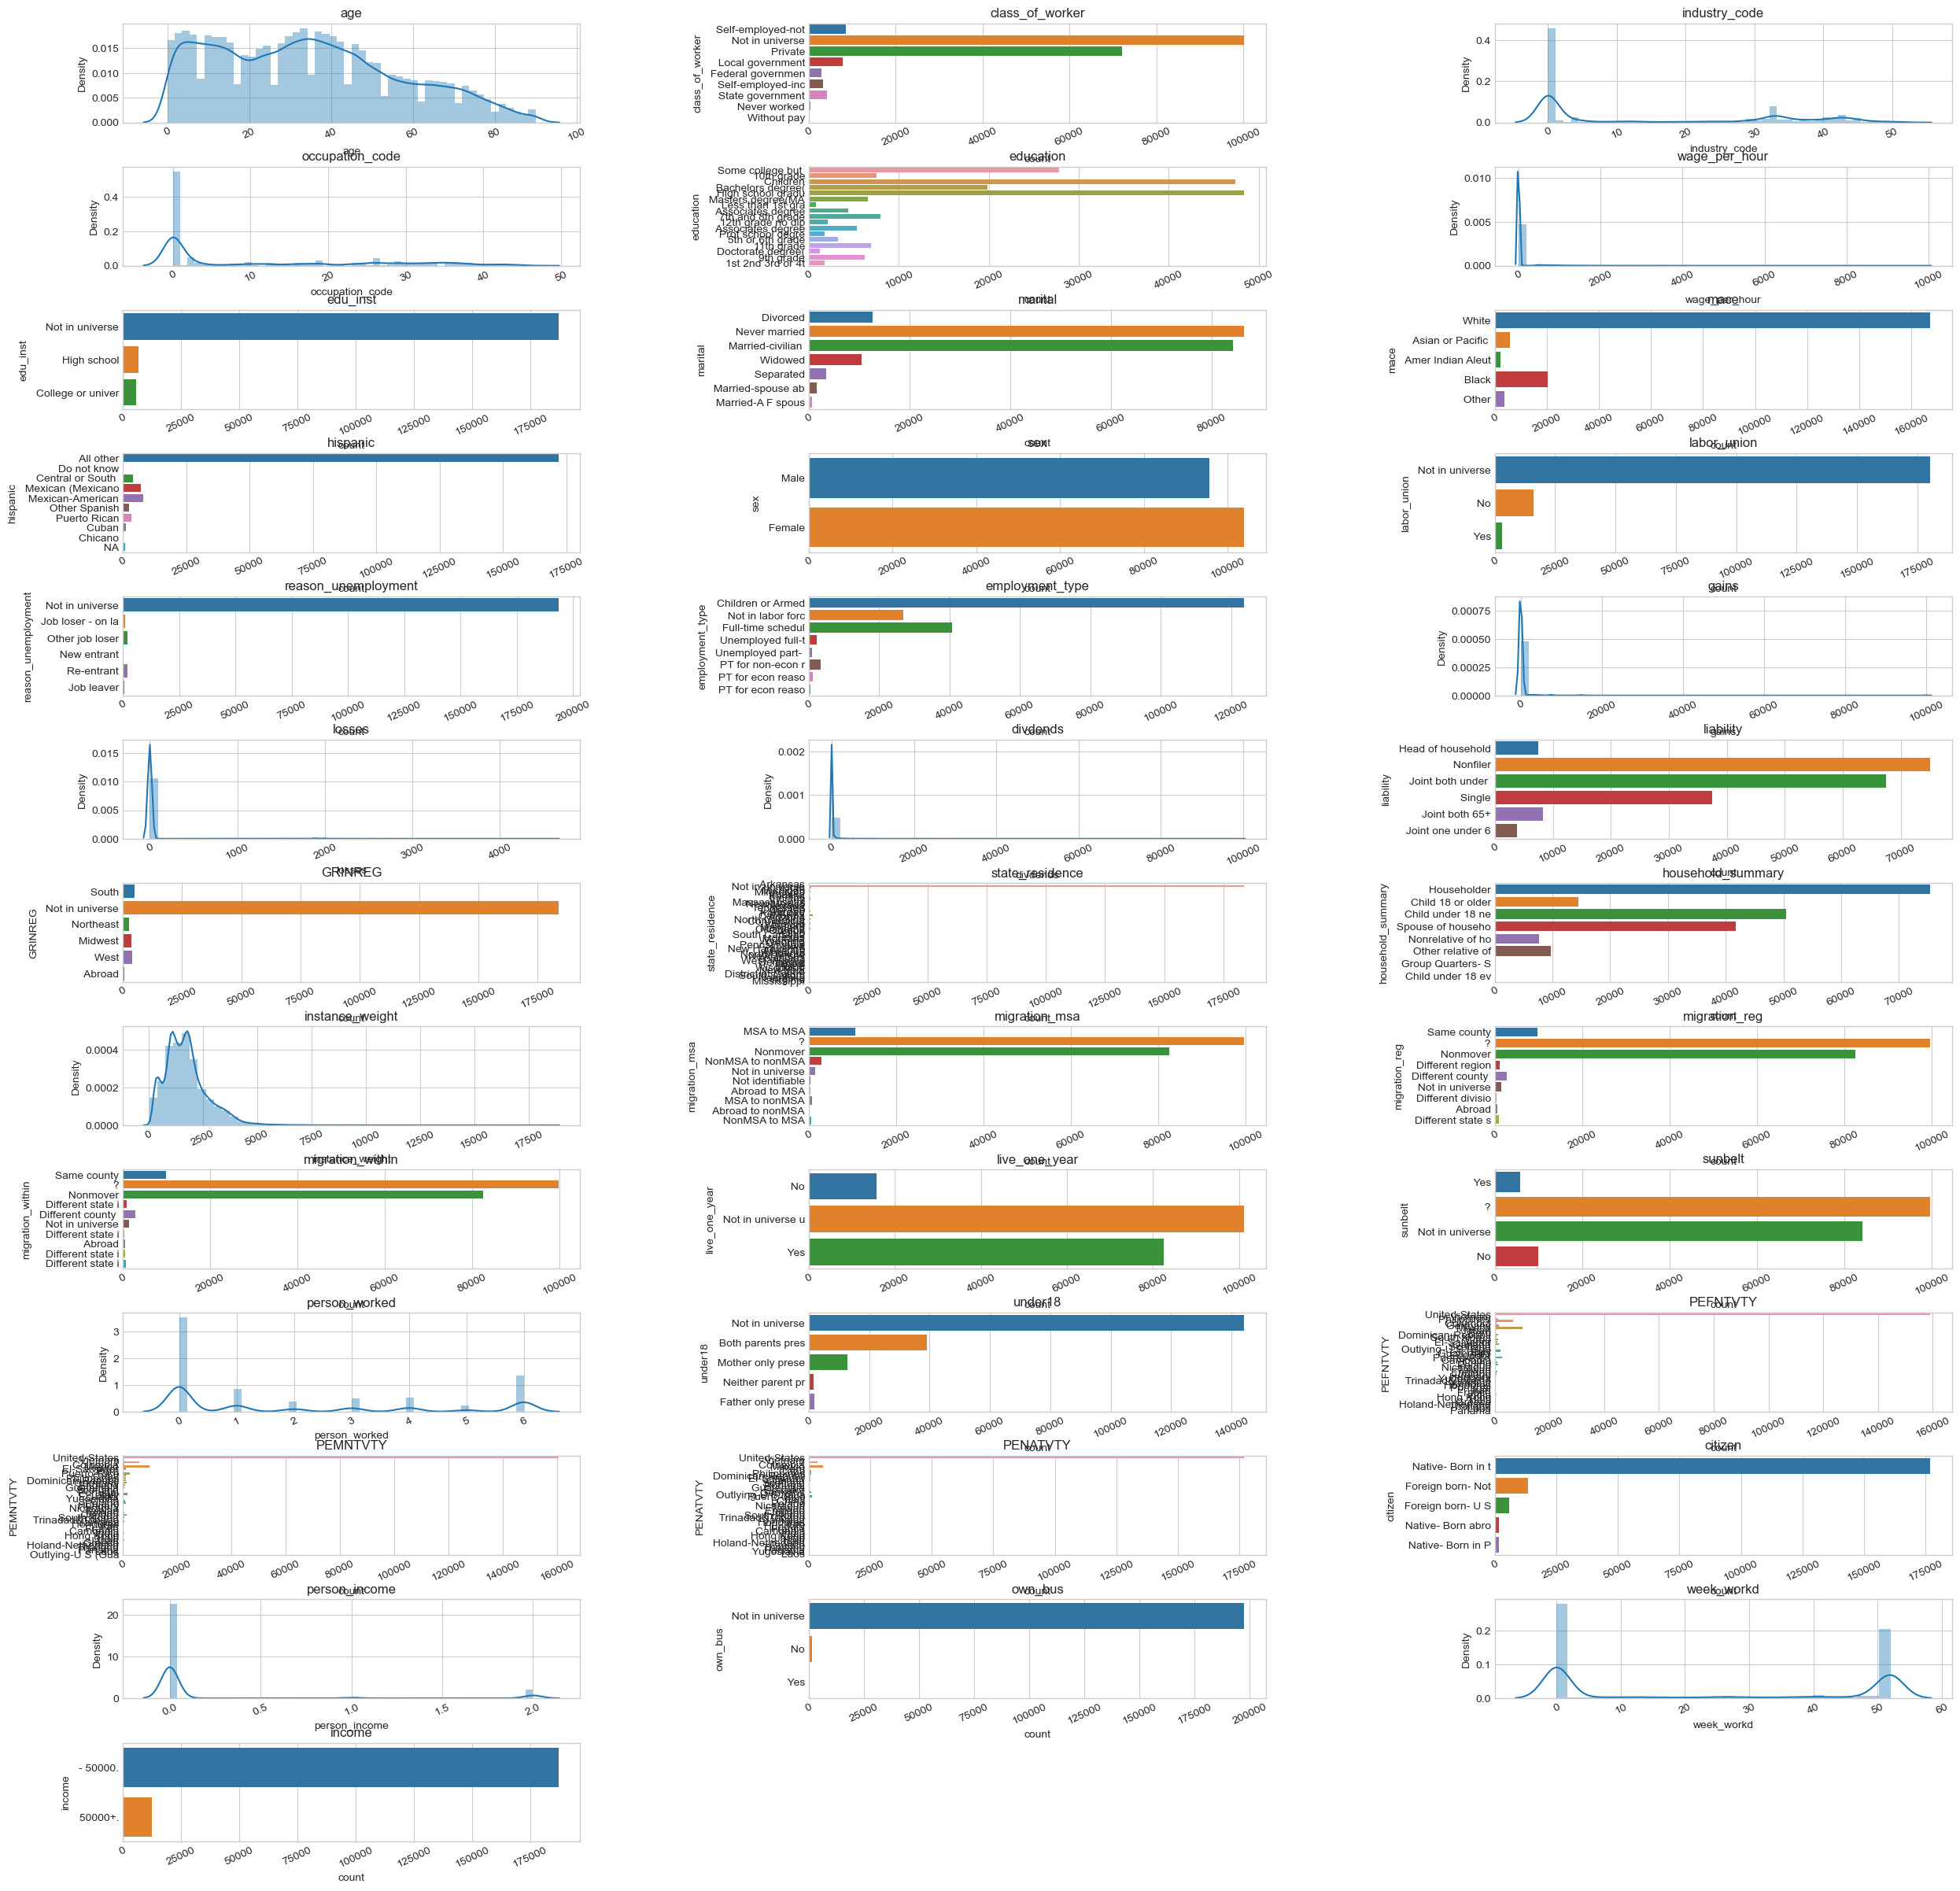

In [30]:
import  math
import numpy as np
import seaborn as sns
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=50, height=35, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_train, cols=3, width=30, height=30, hspace=0.45, wspace=0.5)

<Axes: >

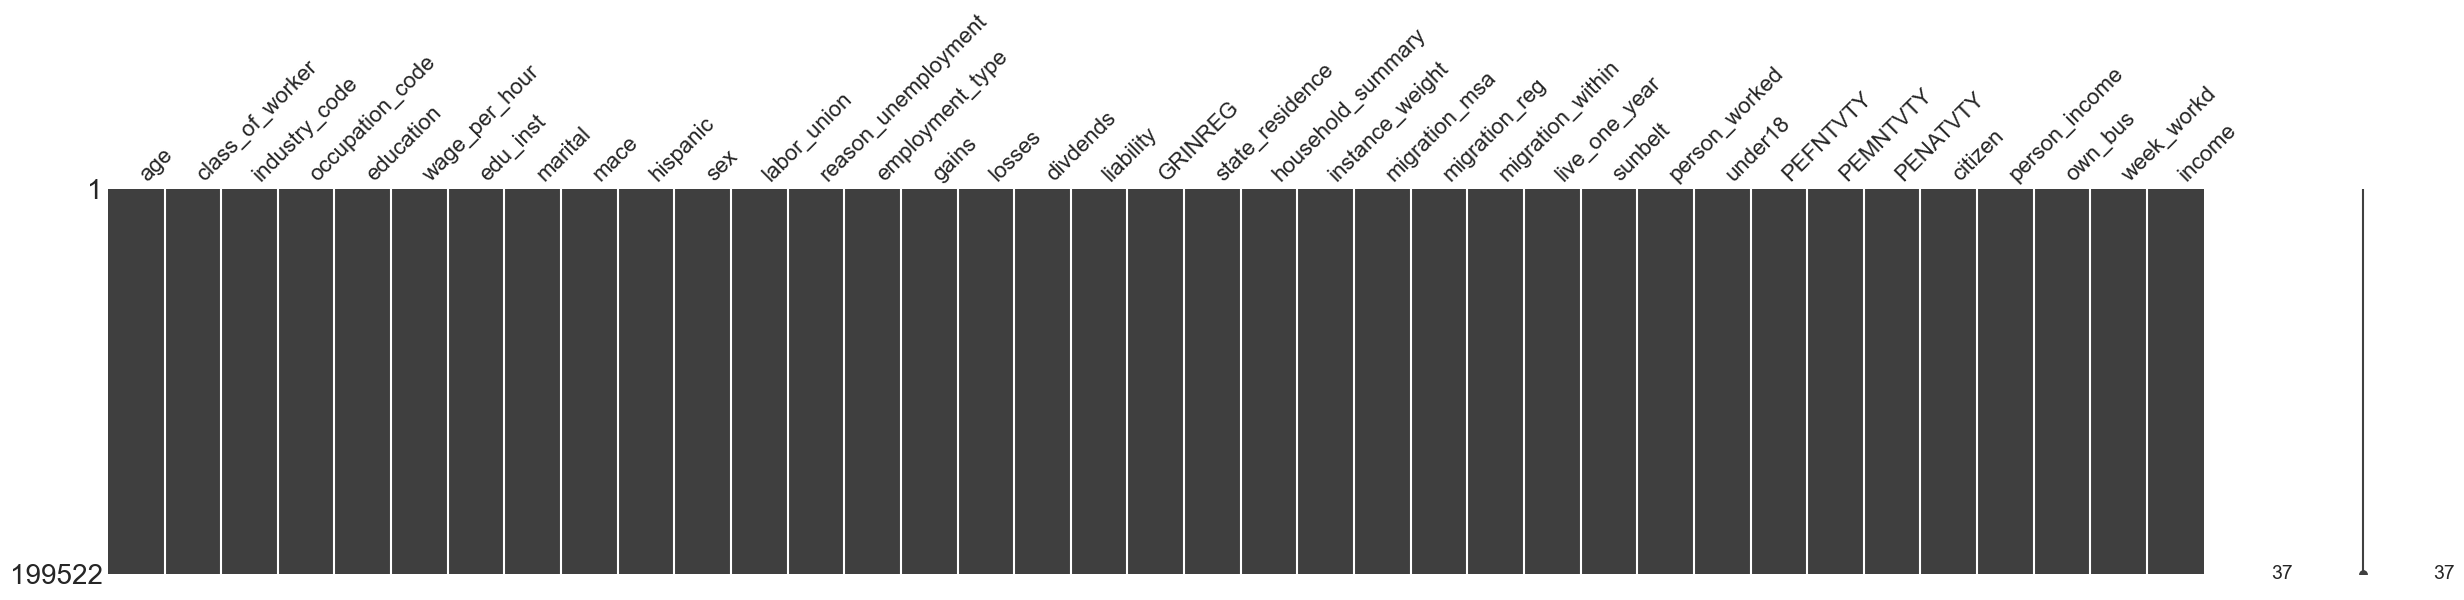

In [32]:
import missingno
missingno.matrix(df_train, figsize = (30,5))